# Additional exercises

For {ref}`ex_rr_1`, you have two options: work with **Python** or with **Excel**. When applicable, python code is provided below each sub-question on this page. If you prefer working with Excel, please use the Python code below to generate an Excel file with the required data and answer the sub-questions in the chronological order. To generate the Excel file, simply copy the Python code and paste it into a notebook on your laptop. **Remove the '#' before the last code line to activate the generation of the Excel file.** Once this is done, open the generated Excel file (located in the same folder as your notebook) in Excel.

In [14]:
import numpy as np
import pandas as pd

years = np.array([1982, 1983, 1984, 1985, 1986])
QmaxY = np.array([211, 64, 99, 122, 165])
data = pd.DataFrame(index = years)
data['Qmax [m3/s]'] = QmaxY
nan_array = np.array([np.nan]*len(data['Qmax [m3/s]']))
data['Rank'] = nan_array
data['Probability of Exceedance'] = nan_array
data['Probability of non-Exceedance'] = nan_array
data['Reduced variate'] = nan_array
data['Return period [years]'] = nan_array
display(data)
#data.to_csv('Data.csv', index=False)

,Qmax [m3/s],Rank,Probability of Exceedance,Probability of non-Exceedance,Reduced variate,Return period [years]
1982,211,NaN,NaN,NaN,NaN,NaN
1983,64,NaN,NaN,NaN,NaN,NaN
1984,99,NaN,NaN,NaN,NaN,NaN
1985,122,NaN,NaN,NaN,NaN,NaN
1986,165,NaN,NaN,NaN,NaN,NaN


```{exercise-start}
:label: ex_rr_1
```
**Extreme value analysis**

You are asked to apply the Gumbel theory for extreme values to determine the design flow of a hypothetical river. No recent data is available, but you have found a very short time-series spanning over a few years in the 1980s, from which you have calculated the yearly maxima.

```{exercise-end}
```

In [15]:
import numpy as np
import pandas as pd

years = np.array([1982, 1983, 1984, 1985, 1986])
QmaxY = np.array([211, 64, 99, 122, 165])
data = pd.DataFrame(index = years)
data['Qmax [m3/s]'] = QmaxY
display(data)

,Qmax [m3/s]
1982,211
1983,64
1984,99
1985,122
1986,165


a) First of all, fill in the table below.

In [16]:
import numpy as np
import pandas as pd

years = np.array([1982, 1983, 1984, 1985, 1986])
QmaxY = np.array([211, 64, 99, 122, 165])
data = pd.DataFrame(index = years)
data['Qmax [m3/s]'] = QmaxY
nan_array = np.array([np.nan]*len(data['Qmax [m3/s]']))
data['Rank'] = nan_array
data['Probability of Exceedance'] = nan_array
data['Probability of non-Exceedance'] = nan_array
data['Reduced variate'] = nan_array
data['Return period [years]'] = nan_array
display(data)

,Qmax [m3/s],Rank,Probability of Exceedance,Probability of non-Exceedance,Reduced variate,Return period [years]
1982,211,NaN,NaN,NaN,NaN,NaN
1983,64,NaN,NaN,NaN,NaN,NaN
1984,99,NaN,NaN,NaN,NaN,NaN
1985,122,NaN,NaN,NaN,NaN,NaN
1986,165,NaN,NaN,NaN,NaN,NaN


:::{dropdown} Answer&nbsp;{ref}`ex_rr_1` a

The table with solutions can be found in the code cell below.

:::

In [17]:
years = np.array([1982, 1983, 1984, 1985, 1986])
QmaxY = np.array([211, 64, 99, 122, 165])
data = pd.DataFrame(index = years)
data['Qmax [m3/s]'] = QmaxY
nan_array = np.array([np.nan]*len(data['Qmax [m3/s]']))
data['Rank [-]'] = data['Qmax [m3/s]'].rank(ascending=False)
data = data.sort_values('Rank [-]')
data['Probability of Exceedance [1/year]'] = data['Rank [-]']/(len(data['Rank [-]'])+1)
data['Probability of non-Exceedance [1/year]'] = 1 - data['Probability of Exceedance [1/year]']
data['Reduced variate [-]'] = -np.log(-np.log(data['Probability of non-Exceedance [1/year]']))
data['Return period [years]'] = (len(data.index.values) + 1) / data['Rank [-]']
data = data.round(3)
display(data)

,Qmax [m3/s],Rank [-],Probability of Exceedance [1/year],Probability of non-Exceedance [1/year],Reduced variate [-],Return period [years]
1982,211,1.0,0.167,0.833,1.702,6.0
1986,165,2.0,0.333,0.667,0.903,3.0
1985,122,3.0,0.500,0.500,0.367,2.0
1984,99,4.0,0.667,0.333,-0.094,1.5
1983,64,5.0,0.833,0.167,-0.583,1.2


b) Next, make the Gumbel graph used to estimate the river flow for very large return periods. The code cell below provides you with a template for plotting the Gumbel graph.

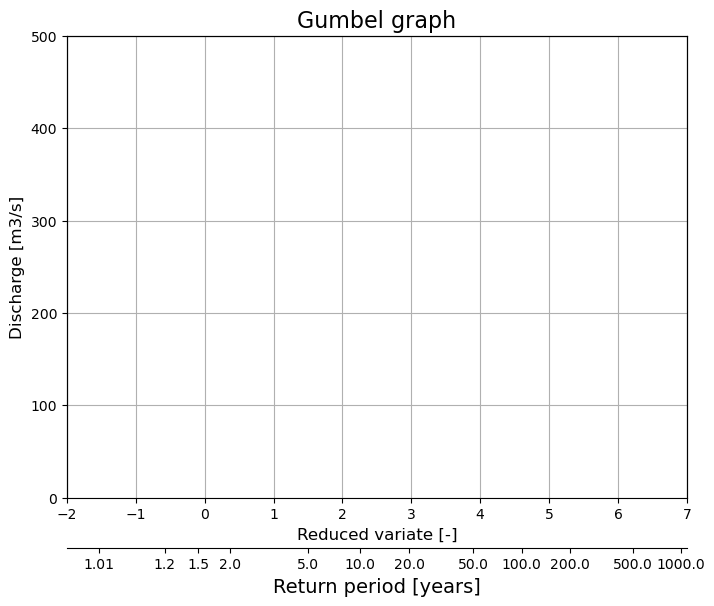

In [18]:
import matplotlib.pyplot as plt

# Plot
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Gumbel graph', fontsize='16')
ax1.set_xlim(-2, 7)
ax1.set_ylim(0,500)
ax1.set_ylabel('Discharge [m3/s]', fontsize='12')
ax1.set_xlabel('Reduced variate [-]', fontsize='12')
plt.grid()

# Set scond x-axis
ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
newlabel = [1.01, 1.2, 1.5, 2., 5., 10., 20., 50., 100., 200., 500., 1000., 2000.] # labels of the xticklabels: the position in the new x-axis
k2_convert = lambda z: -np.log(-np.log(1-1/z))
newpos   = [k2_convert(z) for z in newlabel]   # position of the xticklabels in the old x-axis
ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('Return period [years]',fontsize='14')
ax2.set_xlim(ax1.get_xlim());

:::{dropdown} Answer&nbsp;{ref}`ex_rr_1` b

The Gumbel graph is generated in the code cell below. Don't get intimated by the length of the code, a big the part of the code below is only used to create the axis labels and make the graph look nicer!

:::

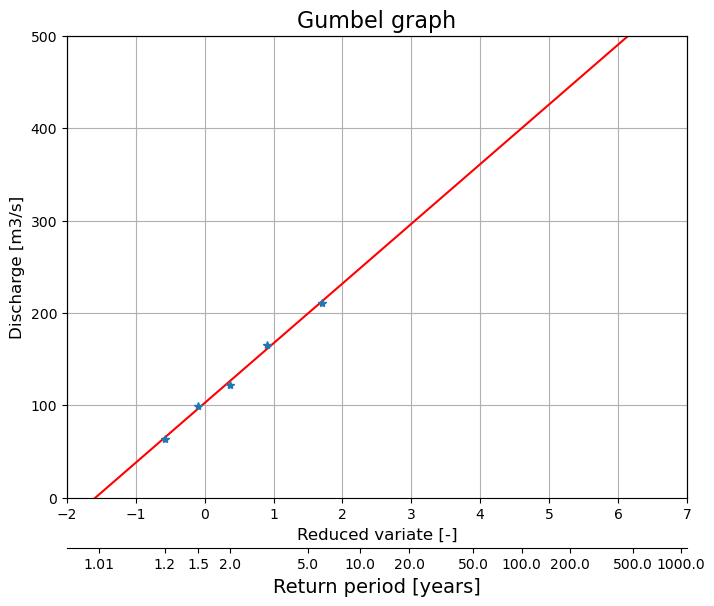

In [19]:
import matplotlib.pyplot as plt

years = np.array([1982, 1983, 1984, 1985, 1986])
QmaxY = np.array([211, 64, 99, 122, 165])
data = pd.DataFrame(index = years)
data['Qmax [m3/s]'] = QmaxY
nan_array = np.array([np.nan]*len(data['Qmax [m3/s]']))
data['Rank [-]'] = data['Qmax [m3/s]'].rank(ascending=False)
data = data.sort_values('Rank [-]')
data['Probability of Exceedance [1/year]'] = data['Rank [-]']/(len(data['Rank [-]'])+1)
data = data.round(3)
data['Probability of non-Exceedance [1/year]'] = 1 - data['Probability of Exceedance [1/year]']
data['Reduced variate [-]'] = -np.log(-np.log(data['Probability of non-Exceedance [1/year]']))
data['Return period [years]'] = (len(data.index.values) + 1) / data['Rank [-]']

X = data['Reduced variate [-]']
y = data['Qmax [m3/s]']

# Computing the coefficients of the regression line (y = mx + b)
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculating the slope (m)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator

# Calculating the intercept (b)
intercept = y_mean - slope * X_mean

# Plot
X_plot = np.linspace(-2, 7, 100)
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Gumbel graph', fontsize='16')
ax1.plot(X_plot, slope * X_plot + intercept, color='red', label='Regression Line')
ax1.plot(data['Reduced variate [-]'], data['Qmax [m3/s]'], '*')
ax1.set_xlim(-2, 7)
ax1.set_ylim(0,500)
ax1.set_ylabel('Discharge [m3/s]', fontsize='12')
ax1.set_xlabel('Reduced variate [-]', fontsize='12')
plt.grid()

# Set scond x-axis
ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
newlabel = [1.01, 1.2, 1.5, 2., 5., 10., 20., 50., 100., 200., 500., 1000., 2000.] # labels of the xticklabels: the position in the new x-axis
k2_convert = lambda z: -np.log(-np.log(1-1/z))
newpos   = [k2_convert(z) for z in newlabel]   # position of the xticklabels in the old x-axis
ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('Return period [years]',fontsize='14')
ax2.set_xlim(ax1.get_xlim());

c) Consider only one year. According to the table (i.e. without applying a Gumbel fit), what is the probability that the annual maximum river flow exceeds the maximum flow measured in 1985?

:::{dropdown} Answer&nbsp;{ref}`ex_rr_1` c

From the table above, the probability can be found to be equal to **0.500**.

:::

d) Consider only one year. According to the table (i.e. without applying a Gumbel fit), what is the probability that the annual maximum river flow is lower than the maximum flow measured in 1984?

:::{dropdown} Answer&nbsp;{ref}`ex_rr_1` d

From the table above, the answer is **0.333**.

:::

e) Based on the Gumbel distribution, estimate the river flow corresponding to a return period of 55.1 years.

:::{dropdown} Answer&nbsp;{ref}`ex_rr_1` e

In the table above, the discharge corresponding to a return period of 55.1 years is equal to **361.2 $\frac{\text{m}^3}{\text{s}}$**.

:::

```{exercise-start}
:label: ex_rr_2
```

True or false?

```{exercise-end}
```

In [20]:
# Note that the code cells below is used for the website only.

In [21]:
from jupyterquiz import display_quiz

In [22]:
q1 = [{
        "question": "Which one of the following statements is true for a Gumbel graph?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "For natural rivers, when applying Gumbel to water levels instead of discharges, one will observe a bend/kink downwards in the Gumbel graph at a return period of approximately 1.5 - 2 years.",
                "correct": True,
                "feedback": "True! It is assumed that every 1.5 to 2 years, the river reaches its bankfull level. This corresponds to the height of the dikes or embankments along the river. When it does, water will spread over a larger area than that of the river and therefore, although the discharge may keep increasing at the same rate as before reaching the bankfull level, the water level will rise more slowly. This will cause a bend downwards in the Gumbel graph."
            },
            {
                "answer": "An observed discharge plotting below the Gumbel line indicates that the actual return period of that discharge is higher",
                "correct": False,
                "feedback": "False! If the observed discharge plots below the Gumbel line, it means that the actual return period of that discharge is lower than what is estimated with the Gumbel distribution. For a given discharge (y-axis), a higher value on the x-axis means a higher return period for that discharge."
            },
            {
                "answer": "When applying Gumbel to water levels, a structure like a bridge causes a bend/kink downwards in the graph.",
                "correct": False,
                "feedback": "False! Since the structure is present permanently, it will not cause any bend in the graph. Since the dimensions of the river channel remain constant as the discharge increases, the water level will rise proportionally to the increase of the discharge."
            }
        ]
    }]
display_quiz(q1)

<IPython.core.display.Javascript object>